**Problem definition:-** To predict the closing price of 1 day candle of bitcoin
*Prediction will be based on the previous opening price, closing price, daily trading volumne and daily high and low of bitcoin.*
*We'll train a model which will predict the bitcoin closing price*

In [1]:
import pandas as pd
#Importing pandas library using import statement

In [2]:
df = pd.read_csv("crypto.csv")
#reading data from a csv file 'crypto.csv"

In [3]:
df.shape
#Checking the size of the dataset

(366, 7)

In [4]:
df.describe()
#Describing the dataset

,Open,High,Low,Close,Adj Close,Volume
count,366.000000,366.000000,366.000000,366.000000,366.000000,3.660000e+02
mean,30601.534741,31114.292387,30140.609952,30654.710185,30654.710185,1.863308e+10
std,6373.605897,6519.995878,6218.219974,6389.897004,6389.897004,9.061264e+09
min,20187.876950,20370.595700,19628.253910,20187.244140,20187.244140,5.331173e+09
25%,26516.091307,26823.505862,26172.211425,26535.559082,26535.559082,1.214883e+10
50%,28420.998045,28984.437500,27980.690430,28419.224610,28419.224610,1.637686e+10
75%,34503.236328,34917.837892,34049.373045,34529.565430,34529.565430,2.290168e+10
max,46987.640630,48969.371090,45678.644530,46970.503910,46970.503910,5.462223e+10


In [5]:
df.head()
#Displaying the first five rows of data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-29,23031.44922,23919.89063,22985.07031,23774.56641,23774.56641,27423687259
1,2023-01-30,23774.64844,23789.34766,22657.58203,22840.13867,22840.13867,27205595568
2,2023-01-31,22840.79688,23225.02148,22765.56836,23139.28320,23139.28320,22837828665
3,2023-02-01,23137.83594,23764.53906,22877.75000,23723.76953,23723.76953,26683255504
4,2023-02-02,23720.82422,24167.21094,23468.59570,23471.87109,23471.87109,32066936882


In [6]:
df.tail()
#Displaying the last five rows of data

,Date,Open,High,Low,Close,Adj Close,Volume
361,2024-01-25,40075.55078,40254.48047,39545.66406,39933.80859,39933.80859,18491782013
362,2024-01-26,39936.81641,42209.38672,39825.69141,41816.87109,41816.87109,25598119893
363,2024-01-27,41815.62500,42195.63281,41431.28125,42120.05469,42120.05469,11422941934
364,2024-01-28,42126.12500,42797.17578,41696.91016,42035.59375,42035.59375,16858971687
365,2024-01-29,42030.91406,42457.75000,41897.93750,42259.04688,42259.04688,14911157248


In [7]:
df.info()
#Getting metadata

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       366 non-null    object 
 1   Open       366 non-null    float64
 2   High       366 non-null    float64
 3   Low        366 non-null    float64
 4   Close      366 non-null    float64
 5   Adj Close  366 non-null    float64
 6   Volume     366 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 20.1+ KB


In [8]:
#dtype of Date column was object, converting it from object to datetime format
df['Date'] = pd.to_datetime(df['Date']) 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       366 non-null    datetime64[ns]
 1   Open       366 non-null    float64       
 2   High       366 non-null    float64       
 3   Low        366 non-null    float64       
 4   Close      366 non-null    float64       
 5   Adj Close  366 non-null    float64       
 6   Volume     366 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 20.1 KB


/tmp/ipykernel_7232/4183502163.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


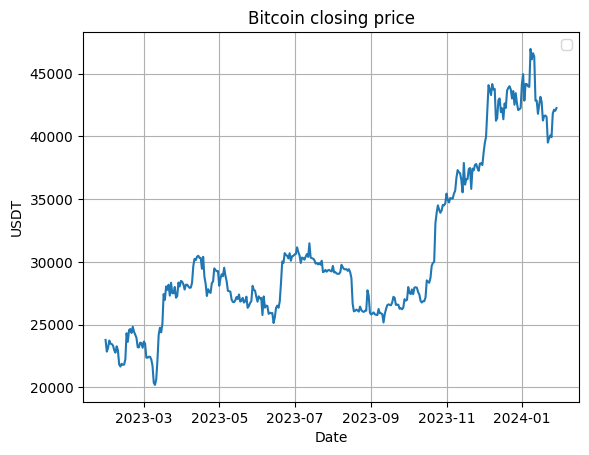

In [10]:
import matplotlib.pyplot as plt
#importing the pyplot from matplotlib library
plt.title("Bitcoin closing price")
plt.xlabel("Date")
plt.ylabel("USDT")
plt.legend()
plt.grid()
plt.plot(df['Date'],df['Close'])
#plotting the Date column on x-axis and y-column on y-axis

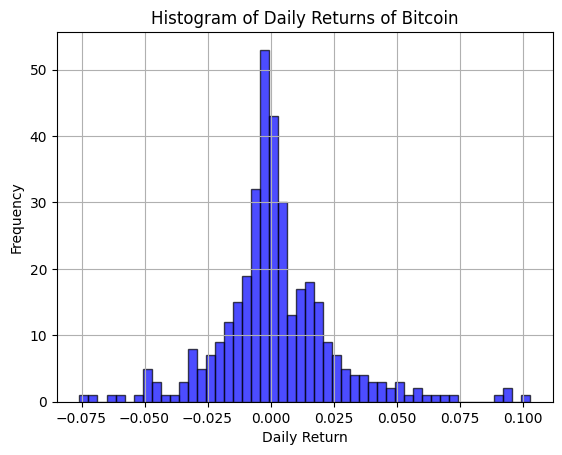

In [11]:
df['Return'] = df['Close'].pct_change()

# Plot a histogram of daily returns
plt.hist(df['Return'], bins=50, alpha=0.7, color='blue', edgecolor='black')

# Customize the plot
plt.title("Histogram of Daily Returns of Bitcoin")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.grid(True)

# Show the plot
plt.show()

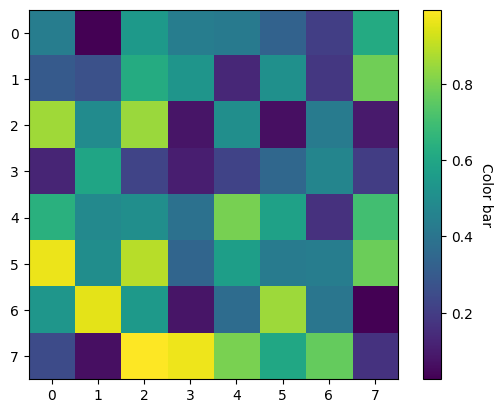

In [12]:
import numpy as np
np.random.seed(2)

# Data
data = np.random.random((8, 8))

# Heat map
fig, ax = plt.subplots()
im = ax.imshow(data)

# Add the color bar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Color bar", rotation=-90, va="bottom")

# Show the plot
plt.show()

**Linear Regression Formula for single variable**
*y = wx + b*
Here, y is an dependent variable, x is an independent variable x is a feature of data in case of single feature we use the above formula, b stand for bias and w stands for weight. 
**Linear Regression Formula for multiple variable**
y = w1.x1 + w2.x2 ..... + wn.xn + b
Here, y is an dependent variable, x is an independent variable x is a feature of data in case of multiple feature we use the above formula, b stand for bias and w stands for weight.

In [13]:
#importing Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [14]:
#Dropping the null values in the DataFrame
df.dropna()

,Date,Open,High,Low,Close,Adj Close,Volume,Return
1,2023-01-30,23774.64844,23789.34766,22657.58203,22840.13867,22840.13867,27205595568,-0.039304
2,2023-01-31,22840.79688,23225.02148,22765.56836,23139.28320,23139.28320,22837828665,0.013097
3,2023-02-01,23137.83594,23764.53906,22877.75000,23723.76953,23723.76953,26683255504,0.025259
4,2023-02-02,23720.82422,24167.21094,23468.59570,23471.87109,23471.87109,32066936882,-0.010618
5,2023-02-03,23469.41211,23678.10352,23279.95508,23449.32227,23449.32227,27083066007,-0.000961
...,...,...,...,...,...,...,...,...
361,2024-01-25,40075.55078,40254.48047,39545.66406,39933.80859,39933.80859,18491782013,-0.003575
362,2024-01-26,39936.81641,42209.38672,39825.69141,41816.87109,41816.87109,25598119893,0.047155
363,2024-01-27,41815.62500,42195.63281,41431.28125,42120.05469,42120.05469,11422941934,0.007250
364,2024-01-28,42126.12500,42797.17578,41696.91016,42035.59375,42035.59375,16858971687,-0.002005


In [15]:
#Performing Feature Engineering
x = df[['Open','High','Low','Volume']]
y = df['Close']

In [16]:
#Splitting the data into training data and testing data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = 42)

In [17]:
model = LinearRegression()
model.fit(x_train,y_train)
#Testting the Linear Regression Model

LinearRegression()

In [18]:
y_pred = model.predict(x_test)

In [19]:
y_pred

array([29501.35781592, 22464.05667688, 21533.06195637, 43421.66068449,
       26989.93946718, 29331.48068285, 30394.06314656, 27860.18261521,
       30405.51140842, 27263.43910376, 42279.43588174, 20566.61080754,
       37822.40677887, 27498.62504872, 25339.44502503, 37361.81007973,
       23589.63115957, 34356.33374544, 41209.190689  , 27577.51079862,
       23075.38161651, 31376.68195002, 30250.58656715, 27511.93163831,
       27608.17164362, 29442.86912676, 25621.99416792, 36351.87097325,
       42218.01453494, 41633.74108013, 24001.22155685, 27035.2325122 ,
       21619.26939048, 42475.66375903, 29342.81869555, 27264.43885468,
       28078.3243155 , 24465.77299001, 47662.80303135, 43152.05560665,
       27033.39884027, 45991.02712062, 23172.40367795, 37241.4714327 ,
       26714.92667993, 27072.38613371, 29246.4628905 , 27981.66872421,
       23375.86472446, 24352.22253105, 27262.14396765, 45939.91861712,
       35660.66435274, 28607.42954601, 29244.08297398, 45421.78825395,
      

In [20]:
rse = model.score(x_test,y_test)

In [21]:
rse*100

99.81513920729901

In [22]:
 w = model.coef_

In [23]:
b = model.intercept_

In [24]:
w

array([-5.18079781e-01,  8.15181987e-01,  7.05523705e-01, -6.41646425e-09])

In [25]:
b

np.float64(-17.85351128099137)

In [26]:
def predict(x):
    result = np.dot(w,x) + b
    return result

In [27]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Return
0,2023-01-29,23031.44922,23919.89063,22985.07031,23774.56641,23774.56641,27423687259,NaN
1,2023-01-30,23774.64844,23789.34766,22657.58203,22840.13867,22840.13867,27205595568,-0.039304
2,2023-01-31,22840.79688,23225.02148,22765.56836,23139.28320,23139.28320,22837828665,0.013097
3,2023-02-01,23137.83594,23764.53906,22877.75000,23723.76953,23723.76953,26683255504,0.025259
4,2023-02-02,23720.82422,24167.21094,23468.59570,23471.87109,23471.87109,32066936882,-0.010618
...,...,...,...,...,...,...,...,...
361,2024-01-25,40075.55078,40254.48047,39545.66406,39933.80859,39933.80859,18491782013,-0.003575
362,2024-01-26,39936.81641,42209.38672,39825.69141,41816.87109,41816.87109,25598119893,0.047155
363,2024-01-27,41815.62500,42195.63281,41431.28125,42120.05469,42120.05469,11422941934,0.007250
364,2024-01-28,42126.12500,42797.17578,41696.91016,42035.59375,42035.59375,16858971687,-0.002005


In [ ]:
input = [67744,	70268,	67590, 163239547.5]
closing_price = predict(input)
print("The closing price will be: ",closing_price)  #42259.04688

In [29]:
for i in range(366):
    input = [df["Open"][i], df["High"][i], df["Low"][i], df["Volume"][i]]
    print(i,"Actual Closing price:", df["Close"][i], "\t\t\t\t", "Predicted price:", predict(input))

0 Actual Closing price: 23774.56641 				 Predicted price: 23589.63115957322
1 Actual Closing price: 22840.13867 				 Predicted price: 22868.52702560973
2 Actual Closing price: 23139.2832 				 Predicted price: 22996.52063638701
3 Actual Closing price: 23723.76953 				 Predicted price: 23336.908480593094
4 Actual Closing price: 23471.87109 				 Predicted price: 23745.436351961747
5 Actual Closing price: 23449.32227 				 Predicted price: 23375.86472445662
6 Actual Closing price: 23331.84766 				 Predicted price: 23370.847128773235
7 Actual Closing price: 22955.66602 				 Predicted price: 22978.412863225793
8 Actual Closing price: 22760.10938 				 Predicted price: 22793.441639780376
9 Actual Closing price: 23264.29102 				 Predicted price: 23075.38161650712
10 Actual Closing price: 22939.39844 				 Predicted price: 22853.514021183833
11 Actual Closing price: 21819.03906 				 Predicted price: 21993.330507903494
12 Actual Closing price: 21651.18359 				 Predicted price: 21587.02438336859
13 